<a href="https://colab.research.google.com/github/hey-sid29/making_classifier_fastAI/blob/main/Classifier_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Classifier Using FastAI modules:

- We will download images for 2 objects(any 2) to perform binary classification:

In [30]:
!pip install duckduckgo_search==3.0.2 --q

In [31]:
import duckduckgo_search
print(duckduckgo_search.__version__)

3.0.2


In [32]:
from duckduckgo_search import ddg_images #Importing ddg_images module to help us download images

from fastcore.all import *

In [33]:
#Creating a helper function to help us download images

def search_images(term, max_images = 50):
  print(f'Searching for {term} images')
  return L(ddg_images(term, max_results=max_images)).itemgot('image')




  ##** L() is a module in fastai/fastcore, its a list with better functionalities for data science tasks

In [48]:
## Testing the helper function

urls = search_images('Nissan Gtr photos', max_images=1)
urls[0]

Searching for Nissan Gtr photos images


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://cimg0.ibsrv.net/ibimg/hgm/600x338-1/100/885/2024-nissan-gt-r_100885112.jpg'

In [49]:
from fastdownload import download_url

dest = 'nissan gt-r.jpg'
download_url(urls[0], dest)



Path('nissan gt-r.jpg')

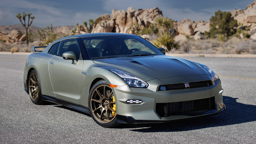

In [50]:
from fastai.vision.all import *
img = Image.open(dest)
img.to_thumb(256, 256)

- The Function is working aptly

- Lets download another image to test:

Searching for Supra photos images


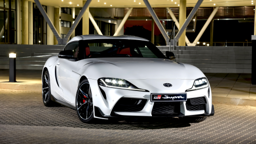

In [37]:
url = search_images('Supra photos', max_images=1)
dest = 'supra.jpg'
download_url(url[0], dest)
img = Image.open(dest)
img.to_thumb(256, 256)

## Creating a classifier which classifies between 2 car(ex: Nissan GT-R and Toyota Supra)

In [38]:
search_terms = 'nissan gt-r', 'toyota_supra'
path= Path('Car_GTR_or_Supra')
from time import sleep

for term in search_terms:
  dest = (path/term)
  dest.mkdir(exist_ok = True, parents = True)
  download_images(dest, urls = search_images(f'{term} images'))
  sleep(10) #Precautionary step, to not overload the servers
  download_images(dest, urls = search_images(f'{term} daytime images'))
  sleep(10)
  download_images(dest, urls = search_images(f'{term} nightime images'))
  sleep(10)
  resize_images(path/term, max_size=400, dest = path/term)

Searching for nissan gt-r images images
Searching for nissan gt-r daytime images images
Searching for nissan gt-r nightime images images
Searching for toyota_supra images images
Searching for toyota_supra daytime images images
Searching for toyota_supra nightime images images


In [39]:
## Removing the broken links or broken images

failed_img = verify_images(get_image_files(path))
failed_img.map(Path.unlink) #Removing the broken images and mapping them
len(failed_img)

18

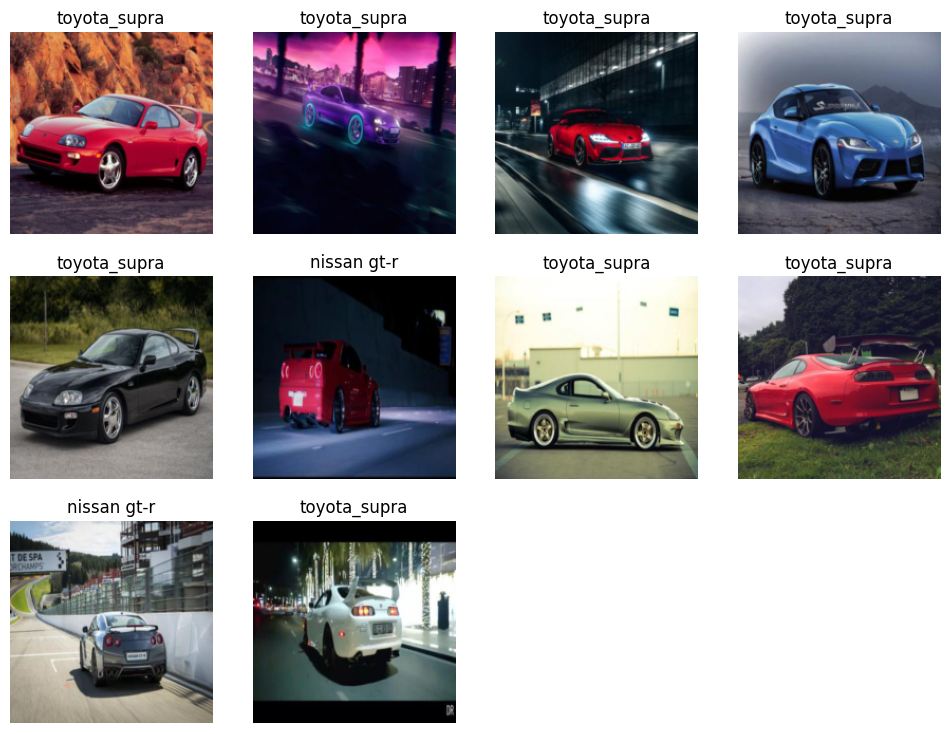

In [40]:
#Creating a DataBlock:

data_block = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=50),
    get_y= parent_label,
    item_tfms = [Resize(192, method = 'squish')]
).dataloaders(path)

data_block.show_batch(max_n=10)

## Buidling and Training A model:


In [41]:
learn = vision_learner(data_block, resnet18, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.158293,0.814038,0.352381,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.489724,0.317076,0.142857,00:03
1,0.329575,0.227736,0.047619,00:03
2,0.223554,0.233690,0.047619,00:05
3,0.161890,0.225182,0.038095,00:04
4,0.126698,0.219403,0.038095,00:04


## Testing the model:

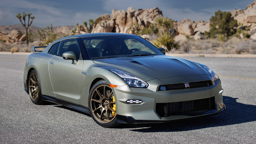

In [51]:
img = Image.open("nissan gt-r.jpg")
img.to_thumb(256, 256)

In [52]:
which_car, _, proba = learn.predict('nissan gt-r.jpg')
print(f"This is a: {which_car}")
print(f"Probablity of it being {which_car}: {proba[0]:.4f}")

This is a: nissan gt-r
Probablity of it being nissan gt-r: 0.9887
